<a href="https://colab.research.google.com/github/NQHuy2001/LearnAI/blob/main/HuyCNNWood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


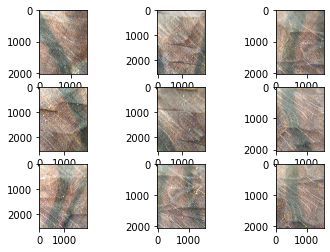

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Wood/train/Mun_soc/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+str(i+38810)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder0 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Mun_soc/'
folder1 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Muong_den/'
folder2 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Po_mu/'
folder3 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Que/'
folder4 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Sa_moc_dau/'
folder5 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Sen_mat/'
folder6 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Soi/'
folder7 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Soi_do/'
folder8 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Tau_mat/'
folder9 = '/content/drive/MyDrive/Colab Notebooks/Wood/train/Thuy_tung/'
folder10= '/content/drive/MyDrive/Colab Notebooks/Wood/train/Trai_li/'
folder11= '/content/drive/MyDrive/Colab Notebooks/Wood/train/Tram_hong/'
folder12= '/content/drive/MyDrive/Colab Notebooks/Wood/train/Xa_cu/'
folder13= '/content/drive/MyDrive/Colab Notebooks/Wood/train/Xoan_ta/'
folder14= '/content/drive/MyDrive/Colab Notebooks/Wood/train/Xoay/'

photos, labels = list(), list()
#Mun_soc
for file in listdir(folder0):
    output = 0
    photo = load_img(folder0+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Muong_den
for file in listdir(folder1):
    output = 1
    photo = load_img(folder1+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Po_mu
for file in listdir(folder2):
    output = 2
    photo = load_img(folder2+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Que
for file in listdir(folder3):
    output = 3
    photo = load_img(folder3+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Sa_moc_dau
for file in listdir(folder4):
    output = 4
    photo = load_img(folder4+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Sen_mat
for file in listdir(folder5):
    output = 5
    photo = load_img(folder5+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Soi
for file in listdir(folder6):
    output = 6
    photo = load_img(folder6+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Soi_do
for file in listdir(folder7):
    output = 7
    photo = load_img(folder7+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Tau_mat
for file in listdir(folder8):
    output = 8
    photo = load_img(folder8+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
#Thuy_tung
for file in listdir(folder9):
    output = 9
    photo = load_img(folder9+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10wood_photos.npy', photos)
save('10wood_labels.npy', labels)

(4548, 200, 200, 3) (4548,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=40, epochs=50, verbose=1)

Epoch 1/50
114/114 [==============================] - 274s 2s/step - loss: 232.2435 - accuracy: 0.2027
Epoch 2/50
114/114 [==============================] - 328s 3s/step - loss: 1.6116 - accuracy: 0.4294
Epoch 3/50
114/114 [==============================] - 271s 2s/step - loss: 1.1757 - accuracy: 0.5888
Epoch 4/50
114/114 [==============================] - 266s 2s/step - loss: 0.9755 - accuracy: 0.6517
Epoch 5/50
114/114 [==============================] - 364s 3s/step - loss: 0.7483 - accuracy: 0.7414
Epoch 6/50
114/114 [==============================] - 270s 2s/step - loss: 0.6539 - accuracy: 0.7768
Epoch 7/50
114/114 [==============================] - 272s 2s/step - loss: 0.4948 - accuracy: 0.8276
Epoch 8/50
114/114 [==============================] - 338s 3s/step - loss: 0.3536 - accuracy: 0.8788
Epoch 9/50
114/114 [==============================] - 278s 2s/step - loss: 0.4175 - accuracy: 0.8628
Epoch 10/50
114/114 [==============================] - 290s 3s/step - loss: 0.5694 - accu

In [ ]:
model.evaluate(photos,labels)
model.save('10wood_Final.h5')

143/143 [==============================] - 86s 602ms/step - loss: 2.6422e-04 - accuracy: 1.0000


In [ ]:
from keras.models import load_model
models=load_model('10wood_Final.h5')

In [ ]:
classes = ["Mun_soc","Muong_den","Po_mu","Que","Sa_moc_dau","Sen_mat","Soi","Soi_do","Tau_mat","Thuy_tung"]

[[0.15367454 0.08319327 0.07816303 0.12540986 0.10767453 0.08289102
  0.09331196 0.08201902 0.10193046 0.0917324 ]]


'Mun_soc'

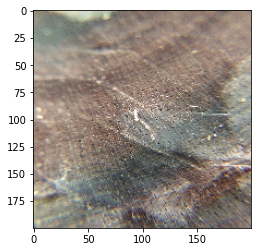

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
#test Go Mun_soc
img = load_img('39798.jpg', target_size=(200,200))
plt.imshow(img)

import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.10607993 0.08007437 0.06953719 0.08112038 0.09660482 0.11107603
  0.14729203 0.15248775 0.07315152 0.08257598]]


'Soi_do'

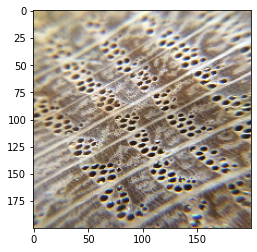

In [ ]:
#test Go Soi_do
img = load_img('50039.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.11160564 0.09299657 0.08759126 0.08522853 0.09763394 0.09275229
  0.1328818  0.11657312 0.0849662  0.09777058]]


'Soi'

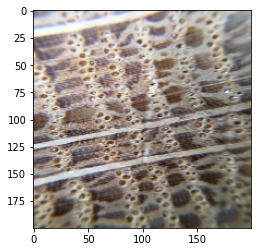

In [ ]:
#test Go Soi
img = load_img('47996.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]